In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
import time
import matplotlib.pyplot as plt
import datetime

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [16]:
def my_func(data):
    unix = time.mktime(datetime.datetime.strptime(data, "%m/%d/%y %H:%M").timetuple())
    return unix

In [22]:
data = pd.read_csv('Binance_BTCUSDT_minute.csv')
data.reset_index(inplace=True)
data['unix'] = data['date'].apply(lambda x: my_func(x))
data.sort_values(["unix"], inplace=True, ascending=[True])

data["difference"] = data["unix"].diff()

data.dropna(inplace=True)
data

,index,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,difference
161138,161138,1.599875e+09,9/11/20 20:41,BTC/USDT,10316.00,10321.09,10316.00,10319.50,16.328427,168497.7053,256,60.0
161137,161137,1.599875e+09,9/11/20 20:42,BTC/USDT,10319.50,10320.31,10318.49,10319.34,12.123487,125108.9314,193,60.0
161136,161136,1.599875e+09,9/11/20 20:43,BTC/USDT,10319.34,10320.14,10318.89,10319.00,13.548103,139806.9635,187,60.0
161135,161135,1.599875e+09,9/11/20 20:44,BTC/USDT,10318.99,10319.72,10316.58,10319.47,14.466964,149266.7081,284,60.0
161134,161134,1.599875e+09,9/11/20 20:45,BTC/USDT,10319.46,10323.12,10319.00,10322.50,24.543748,253313.9884,334,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,1.609568e+09,1/2/21 0:05,BTC/USDT,29224.64,29243.32,29211.36,29237.93,21.615043,631845.6148,820,60.0
3,3,1.609568e+09,1/2/21 0:06,BTC/USDT,29237.93,29263.97,29231.96,29240.00,28.868020,844288.0194,960,60.0
2,2,1.609568e+09,1/2/21 0:07,BTC/USDT,29240.00,29284.12,29229.01,29279.72,24.651675,721200.3803,828,60.0
1,1,1.609568e+09,1/2/21 0:08,BTC/USDT,29279.72,29307.01,29267.23,29269.56,32.398455,948700.0985,897,60.0


<AxesSubplot:xlabel='unix'>

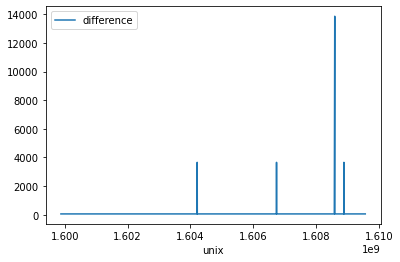

In [23]:
data.plot(x="unix", y="difference", kind="line")

In [25]:
data

,index,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,difference
161138,161138,1.599875e+09,9/11/20 20:41,BTC/USDT,10316.00,10321.09,10316.00,10319.50,16.328427,168497.7053,256,60.0
161137,161137,1.599875e+09,9/11/20 20:42,BTC/USDT,10319.50,10320.31,10318.49,10319.34,12.123487,125108.9314,193,60.0
161136,161136,1.599875e+09,9/11/20 20:43,BTC/USDT,10319.34,10320.14,10318.89,10319.00,13.548103,139806.9635,187,60.0
161135,161135,1.599875e+09,9/11/20 20:44,BTC/USDT,10318.99,10319.72,10316.58,10319.47,14.466964,149266.7081,284,60.0
161134,161134,1.599875e+09,9/11/20 20:45,BTC/USDT,10319.46,10323.12,10319.00,10322.50,24.543748,253313.9884,334,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,1.609568e+09,1/2/21 0:05,BTC/USDT,29224.64,29243.32,29211.36,29237.93,21.615043,631845.6148,820,60.0
3,3,1.609568e+09,1/2/21 0:06,BTC/USDT,29237.93,29263.97,29231.96,29240.00,28.868020,844288.0194,960,60.0
2,2,1.609568e+09,1/2/21 0:07,BTC/USDT,29240.00,29284.12,29229.01,29279.72,24.651675,721200.3803,828,60.0
1,1,1.609568e+09,1/2/21 0:08,BTC/USDT,29279.72,29307.01,29267.23,29269.56,32.398455,948700.0985,897,60.0


In [26]:
np.mean(data['difference'].values[:int(161139/3)])

60.0

In [27]:
for row in data.itertuples():
    if row.difference > 60:
        print(row)
        break


Pandas(Index=88865, index=88865, unix=1604214840.0, date='11/1/20 1:14', symbol='BTC/USDT', open=13743.22, high=13754.95, low=13743.22, close=13754.95, _9=35.100491, _10=482649.3774, tradecount=593, difference=3660.0)
